In [1]:
import random
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from math import exp
%matplotlib inline
import math

In [2]:
def closest_node(data, t, map, m_rows, m_cols):
    result = (0,0)
    small_dist = 1.0e20
    for i in range(m_rows):
        for j in range(m_cols):
            ed = euc_dist(map[i][j], data[t][:-1])
            if ed < small_dist:
                small_dist = ed
                result = (i,j)
    return result

In [3]:
def euc_dist(v1, v2):
    return np.linalg.norm(v1 - v2)

In [4]:
def manhattan_dist(r1, c1, r2, c2):
    return np.abs(r1-r2) + np.abs(c1-c2)

In [5]:
Dim = 784
Rows = 12; Cols = 12
RangeMax = Rows + Cols
LearnMax = 0.06
StepsMax = 700
    
data = pd.read_csv('MNISTnumImages5000_balanced.txt', sep = '\t', header=None)
data['labels'] = pd.read_csv('MNISTnumLabels5000_balanced.txt', header=None)
    
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, shuffle = True, random_state=42)
    
train_data.reset_index(inplace=True, drop=True)
train_data = train_data.values.tolist()
for i in range(len(train_data)):
    train_data[i][-1] = int(train_data[i][-1])
        
print("Constructing a 12 by 12 SOM from the MNIST data")
map = np.random.random_sample(size=(Rows,Cols,Dim))
for s in range(StepsMax):
    if (s % 10) == 0: print("Step = ", str (s))
    pct_left = 1 - ((s * 1.0) / StepsMax)
    curr_range = (int)(pct_left * RangeMax)
    curr_rate = pct_left * LearnMax
        
    for i in range(len(train_data)):
            #t = train_data[i][:-1]
        (bmu_row, bmu_col) = closest_node(train_data, i, map, Rows, Cols)
        for j in range(Rows):
            for k in range(Cols):
                if manhattan_dist(bmu_row, bmu_col,j,k) < curr_range:
                    map[j][k] = map[j][k] + curr_rate * (train_data[i][:-1] - map[j][k])
print("SOM construction complete")
map_neuron_weights = map

Constructing a 12 by 12 SOM from the MNIST data
Step =  0
Step =  10
Step =  20
Step =  30
Step =  40
Step =  50
Step =  60
Step =  70
Step =  80
Step =  90
Step =  100
Step =  110
Step =  120
Step =  130
Step =  140
Step =  150
Step =  160
Step =  170
Step =  180
Step =  190
Step =  200
Step =  210
Step =  220
Step =  230
Step =  240
Step =  250
Step =  260
Step =  270
Step =  280
Step =  290
Step =  300
Step =  310
Step =  320
Step =  330
Step =  340
Step =  350
Step =  360
Step =  370
Step =  380
Step =  390
Step =  400
Step =  410
Step =  420
Step =  430
Step =  440
Step =  450
Step =  460
Step =  470
Step =  480
Step =  490
Step =  500
Step =  510
Step =  520
Step =  530
Step =  540
Step =  550
Step =  560
Step =  570
Step =  580
Step =  590
Step =  600
Step =  610
Step =  620
Step =  630
Step =  640
Step =  650
Step =  660
Step =  670
Step =  680
Step =  690
SOM construction complete


In [6]:
test_data.reset_index(inplace=True, drop=True)
test_data = test_data.values.tolist()
for i in range(len(test_data)):
    test_data[i][-1] = int(test_data[i][-1])

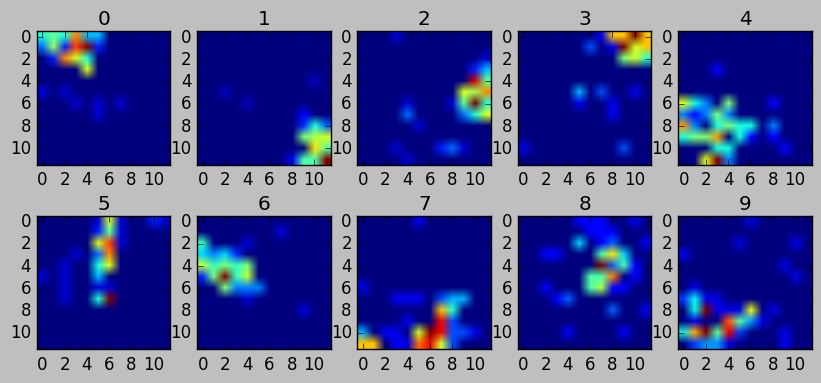

In [61]:
df = pd.DataFrame(test_data)
j = 0
k = 0
fig, axs = plt.subplots(2, 5, figsize=(10,10))
plt.subplots_adjust(wspace=0.2, hspace=-0.7)
plt.style.use('default')

for digit in set([row[-1] for row in test_data]):
    dataset = df[df[784] == digit]
    dataset = dataset.values.tolist()
    
    scores = np.zeros((12,12))
    for l in range(len(dataset)):
        res = closest_node(dataset, l, map, Rows, Cols)
        scores[res[0]][res[1]] = scores[res[0]][res[1]] + 1
         
    axs[j, k].imshow(scores)
    axs[j, k].set_title(str(digit))
    k = k + 1
    if k == 5:
        k = 0
        j = 1

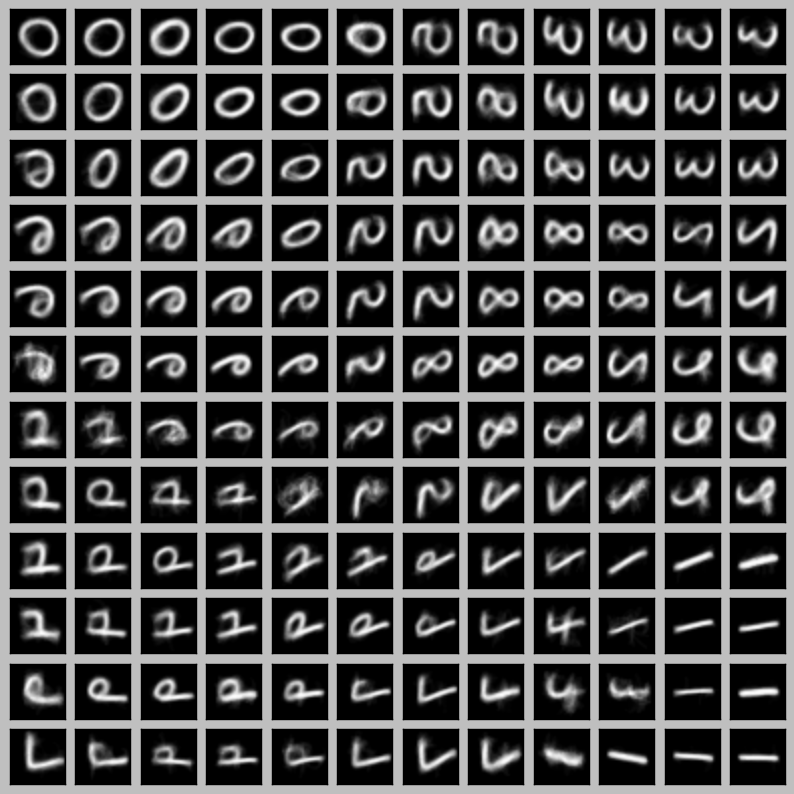

In [49]:
fig, axs = plt.subplots(12, 12,figsize=(10,10))
plt.style.use('grayscale')
l = 0
k = 0
for i in range(12):
    for j in range(12):
        im = np.reshape(map[i][j],(28,28)) 
        axs[l, k].imshow(im)
        axs[l,k].xaxis.set_visible(False)
        axs[l,k].yaxis.set_visible(False)

        k = k + 1
        if k == 12:
            k = 0
            l = l + 1

In [9]:
%store map_neuron_weights

Stored 'map_neuron_weights' (ndarray)


In [10]:
%store -r map_neuron_weights

In [11]:
#map_neuron_weights = map_neuron_weights.tolist()

In [12]:
num_of_layers = int(input('Enter the number of layers: '))

Enter the number of layers: 1


In [13]:
def initialize_network(n, l, h, o, network):
    a = network.tolist()
    flat_list = [item for sublist in a for item in sublist]
    def r():
        return random.uniform(-0.5, 0.5)
    
    neural_network = []
    for i in range(l):
        if i == 0:
            neural_network.append([{'w':list(flat_list[j])} for j in range(144)])
        else:
            neural_network.append([{'w':[r() for i in range(h)]} for j in range(h)])
    
    neural_network.append([{'w':[r() for i in range(h)]} for j in range(o)])
    return neural_network

In [14]:
#net = initialize_network(features, num_of_layers, 100, classes, map_neuron_weights)

In [15]:
def summing_function(weights, inputs):
    bias = 0
    summ = 0.00
    for i in range(len(weights)):
        summ += (weights[i] * float(inputs[i]))
    return summ + bias

In [16]:
def activation_function(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def feed_forward(network, example, map_neuron_weights):
    layer_input, layer_output = example, []
    for i in range(len(network)):
        for neuron in network[i]:  
            summ = summing_function(neuron['w'], layer_input)
            neuron['o'] = activation_function(summ)
            layer_output.append(neuron['o'])
        if i == 0:
            position = closest_node([example, example], 0, map_neuron_weights, 12, 12)
            layer_output = np.zeros(144)
            layer_output = np.reshape(layer_output, (12,12))
            layer_output[position[0]][position[1]] = 1
            layer_output = list(np.reshape(layer_output, (144)))
            
        layer_input, layer_output = layer_output, []
    return layer_input

In [18]:
def activation_derivative(z):
    return z * (1 - z)

In [19]:
def backpropagate(network, example):
    #network = network.tolist()
    #network = [item for sublist in a for item in sublist]
    for i in range(len(network)-1, -1, -1):
        for j in range(len(network[i])):
            err = 0.00
            if i == len(network)-1:
                err = example[j] - network[i][j]['o']
            else:
                summ = 0.00
                for neuron in network[i+1]:
                    summ += neuron['w'][j] * neuron['d']
                err = summ
            network[i][j]['d'] = activation_derivative(network[i][j]['o']) * err

In [20]:
def update_weights(network, example, delta):
    for i in range(len(network)):
        if i == 0:
            continue
        #if i != 0:
            #t = [neuron['o'] for neuron in network[i-1]]
        #else:
            #t = example[:-1]
        
        #if i == 0:
            #continue
        t = [neuron['o'] for neuron in network[i-1]]
        
        for neuron, d in zip(network[i], range(0, len(network[i]))):
            for f in range(len(t)):
                neuron['w'][f] += LEARNING_RATE * float(t[f]) * neuron['d']
                if delta is not None:
                    neuron['w'][f] += MOMENTUM_RATE * delta[d]
                neuron['w'][-1] += LEARNING_RATE * neuron['d']

In [21]:
def sse(actual, target):
    summ = 0.00
    for i in range(len(actual)):
        summ += (actual[i] - target[i])**2
    return summ

In [22]:
def stochastic_gradient_descent(network, classes, training_data):
    for epoch in range(0, EPOCHS):
        first_example = True
        total_error = 0.00
        for example in training_data:
            temporal_delta = [neuron['d'] \
                for layer in network for neuron in layer] \
                if not first_example else None
            outputs = [0 for _ in range(classes)]
            outputs[int(example[-1])] = 1
            actual = feed_forward(network, example, map_neuron_weights)
            total_error += sse(actual, outputs)
            backpropagate(network, outputs)
            update_weights(network, example, temporal_delta)
            reset_neurons(network)
            first_example = False
        print('>epoch=%d, error=%.3f' %(epoch, total_error))
        #if epoch % 10 == 0:
        MSE.append(total_error/len(training_data))
        #TRP.append(performance_measure(NETWORK, TRAIN))
        #TEP.append(performance_measure(NETWORK, TEST))

In [23]:
def reset_neurons(network):
    for layer in network:
        for neuron in layer:
            neuron['o'] = 0

In [24]:
def performance_measure(network, data):
    correct, total = 0, 0
    for example in data:
        if check_output(network, example) == float(example[-1]):
            correct += 1
        total += 1
    return 100*(correct / total)

def check_output(network, example):
    output = feed_forward(network, example, map_neuron_weights)
    return output.index(max(output))


In [25]:
def plot_data():
    x = range(0, EPOCHS)
    fig, ax2 = plt.subplots()
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MSE', color='blue')
    line, = ax2.plot(x, MSE, '-', c='blue', lw='1', label='MSE')
    fig.tight_layout()
    plt.show()
    plt.clf()

In [58]:
TRAIN = train_data
features = len(TRAIN[0][:-1])
classes = len(list(set([c[-1] for c in TRAIN])))
NETWORK = initialize_network(features, num_of_layers, 144, classes, map_neuron_weights)
LEARNING_RATE, MOMENTUM_RATE = 0.01, 0.003

EPOCHS = 50
MSE, TRP, TEP = [], [], []
stochastic_gradient_descent(NETWORK, classes, TRAIN)


>epoch=0, error=5305.713
>epoch=1, error=3822.315
>epoch=2, error=3698.318
>epoch=3, error=3666.019
>epoch=4, error=3654.239
>epoch=5, error=3649.186
>epoch=6, error=3646.803
>epoch=7, error=3645.607
>epoch=8, error=3644.980
>epoch=9, error=3644.641
>epoch=10, error=3644.452
>epoch=11, error=3644.344
>epoch=12, error=3644.281
>epoch=13, error=3644.243
>epoch=14, error=3644.220
>epoch=15, error=3644.205
>epoch=16, error=3644.195
>epoch=17, error=3644.187
>epoch=18, error=3644.182
>epoch=19, error=3644.177
>epoch=20, error=3644.173
>epoch=21, error=3644.170
>epoch=22, error=3644.166
>epoch=23, error=3644.163
>epoch=24, error=3644.160
>epoch=25, error=3644.157
>epoch=26, error=3644.154
>epoch=27, error=3644.152
>epoch=28, error=3644.149
>epoch=29, error=3644.146
>epoch=30, error=3644.143
>epoch=31, error=3644.140
>epoch=32, error=3644.138
>epoch=33, error=3644.135
>epoch=34, error=3644.132
>epoch=35, error=3644.129
>epoch=36, error=3644.126
>epoch=37, error=3644.124
>epoch=38, error=3644.

In [54]:
result = []
for row in train_data:
    prediction = check_output(NETWORK, row)
    result.append([row[-1],prediction])

In [55]:
cm_train = np.zeros((10,10))
for i in range(len(result)):
    cm_train[result[i][0]][result[i][1]] = cm_train[result[i][0]][result[i][1]] + 1

In [56]:
cm_train

array([[ 29.,   0.,  75., 117.,  67.,   1.,  27.,  17.,  37.,  19.],
       [  0.,   0.,  59., 182.,  72.,   0.,  42.,  11.,   5.,  24.],
       [ 61.,   2.,  42.,  98.,   5.,   3.,  57.,   7.,  66.,  54.],
       [ 34.,   2.,  46., 128.,  34.,   0.,  15.,  52.,  33.,  71.],
       [ 40.,   2.,  29.,  72.,  60.,   4.,  37.,  81.,  57.,  24.],
       [  4.,   1.,  42.,  94.,  34.,   0.,  64.,  38.,  41.,  84.],
       [ 57.,  16.,   1., 102.,   6.,  20.,  57.,  12.,  92.,  39.],
       [ 40.,   0.,  25., 114.,  27.,  14.,  18.,  56.,  10.,  84.],
       [ 38.,   1.,  89.,  84.,  90.,   1.,  75.,   5.,  13.,  23.],
       [ 35.,   0.,   4.,  81.,  73.,   3.,  26.,  60.,  40.,  67.]])

In [30]:
result = []
for row in test_data:
    prediction = check_output(NETWORK, row)
    result.append([row[-1],prediction])

In [31]:
cm_test = np.zeros((10,10))
for i in range(len(result)):
    cm_test[result[i][0]][result[i][1]] = cm_test[result[i][0]][result[i][1]] + 1

In [32]:
cm_test

array([[ 0.,  0., 15.,  9., 19.,  7., 10.,  0., 20., 31.],
       [ 0.,  0., 21.,  7.,  0., 11.,  9.,  0., 48.,  9.],
       [ 3.,  0.,  1., 14., 22.,  8.,  1.,  7., 24., 25.],
       [ 0.,  0.,  9., 12., 16., 21.,  3.,  9.,  8.,  7.],
       [ 3.,  0.,  8.,  1.,  7., 10.,  6.,  9., 36., 14.],
       [ 0.,  0.,  2.,  1., 23., 42.,  4.,  0., 25.,  1.],
       [ 5.,  0.,  6.,  2., 24., 21.,  4.,  5., 30.,  1.],
       [17.,  0.,  7.,  8.,  3.,  9., 24., 13., 18., 13.],
       [ 0.,  0.,  4.,  6.,  7., 14., 13., 10., 19.,  8.],
       [ 8.,  0.,  6.,  3., 20., 12.,  2., 18., 12., 30.]])

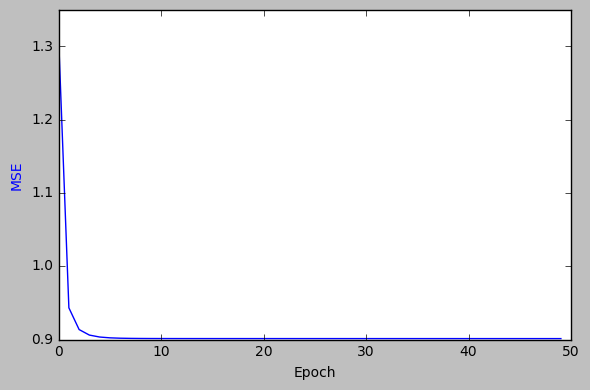

In [57]:
plot_data()
plt.style.use('default')